# Neural Network

In [1]:
import pandas as pd

In [2]:
dset=pd.read_csv('Churn_Modelling.csv')

In [3]:
dset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
dset.shape

(10000, 14)

In [5]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
y=dset['Exited']

In [8]:
x=dset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [9]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [10]:
geo=dset['Geography']

In [11]:
geo=pd.get_dummies(geo, drop_first=True)

In [12]:
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
gender=dset['Gender']

In [14]:
gender=pd.get_dummies(gender,drop_first=True)

In [15]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [16]:
x_final=pd.concat([x,gender,geo],axis=1)

In [17]:
x_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x_final,y,test_size=0.20)

In [20]:
X_train.shape

(8000, 11)

In [21]:
X_test.shape

(2000, 11)

In [22]:
from keras.models import Sequential

In [23]:
model = Sequential()

In [24]:
model.get_config()

{'name': 'sequential', 'layers': []}

In [25]:
from keras.layers import Dense

In [26]:
model.add(Dense(units=8,input_dim=11, activation='relu'))

In [27]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.get_layer("dense").get_weights()

[array([[-0.28893694,  0.31880152,  0.16630912, -0.14820361,  0.06909543,
          0.11174589, -0.4108508 , -0.11622065],
        [ 0.18616903,  0.4257638 , -0.42957675,  0.41048086, -0.1678007 ,
          0.560391  ,  0.4747296 ,  0.07771587],
        [ 0.3743034 ,  0.08384514, -0.01029551, -0.46552402, -0.26306373,
          0.09877354,  0.4889788 , -0.42037675],
        [-0.08707687, -0.17901036, -0.26952034, -0.30985183, -0.19996908,
         -0.41465327, -0.55093044,  0.01430929],
        [-0.2731    , -0.0934602 ,  0.42557555,  0.50996846,  0.23441899,
         -0.44306955, -0.39938253, -0.25877035],
        [-0.23225296, -0.3176662 , -0.44560835, -0.28097185,  0.03490853,
          0.37751597, -0.37710696, -0.26129252],
        [ 0.10209703,  0.5585734 , -0.53723824,  0.35940862, -0.2169297 ,
         -0.03455561,  0.18222171, -0.4122017 ],
        [-0.16316634,  0.06821346,  0.06708038, -0.01556444, -0.40642866,
          0.28674072,  0.000817  ,  0.1277901 ],
        [-0.4780

In [30]:
model.add(Dense(units=6, activation='relu',bias_initializer="zeros",kernel_initializer="zeros"))

In [31]:
model.get_config

<bound method Sequential.get_config of <keras.engine.sequential.Sequential object at 0x000001CF5C41E130>>

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.add(Dense(units=1, activation='sigmoid'))

In [34]:
model.get_config

<bound method Sequential.get_config of <keras.engine.sequential.Sequential object at 0x000001CF5C41E130>>

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.get_weights()

[array([[-0.28893694,  0.31880152,  0.16630912, -0.14820361,  0.06909543,
          0.11174589, -0.4108508 , -0.11622065],
        [ 0.18616903,  0.4257638 , -0.42957675,  0.41048086, -0.1678007 ,
          0.560391  ,  0.4747296 ,  0.07771587],
        [ 0.3743034 ,  0.08384514, -0.01029551, -0.46552402, -0.26306373,
          0.09877354,  0.4889788 , -0.42037675],
        [-0.08707687, -0.17901036, -0.26952034, -0.30985183, -0.19996908,
         -0.41465327, -0.55093044,  0.01430929],
        [-0.2731    , -0.0934602 ,  0.42557555,  0.50996846,  0.23441899,
         -0.44306955, -0.39938253, -0.25877035],
        [-0.23225296, -0.3176662 , -0.44560835, -0.28097185,  0.03490853,
          0.37751597, -0.37710696, -0.26129252],
        [ 0.10209703,  0.5585734 , -0.53723824,  0.35940862, -0.2169297 ,
         -0.03455561,  0.18222171, -0.4122017 ],
        [-0.16316634,  0.06821346,  0.06708038, -0.01556444, -0.40642866,
          0.28674072,  0.000817  ,  0.1277901 ],
        [-0.4780

In [37]:
from keras.optimizers import Adam

In [38]:
model.compile(loss="binary_crossentropy",optimizer=Adam(learning_rate=0.0000001))

In [39]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 27s 2ms/step - loss: 0.6931
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 11/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 12/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 13/100

In [40]:
model.get_weights()

[array([[-0.28893694,  0.31880152,  0.16630912, -0.14820361,  0.06909543,
          0.11174589, -0.4108508 , -0.11622065],
        [ 0.18616903,  0.4257638 , -0.42957675,  0.41048086, -0.1678007 ,
          0.560391  ,  0.4747296 ,  0.07771587],
        [ 0.3743034 ,  0.08384514, -0.01029551, -0.46552402, -0.26306373,
          0.09877354,  0.4889788 , -0.42037675],
        [-0.08707687, -0.17901036, -0.26952034, -0.30985183, -0.19996908,
         -0.41465327, -0.55093044,  0.01430929],
        [-0.2731    , -0.0934602 ,  0.42557555,  0.50996846,  0.23441899,
         -0.44306955, -0.39938253, -0.25877035],
        [-0.23225296, -0.3176662 , -0.44560835, -0.28097185,  0.03490853,
          0.37751597, -0.37710696, -0.26129252],
        [ 0.10209703,  0.5585734 , -0.53723824,  0.35940862, -0.2169297 ,
         -0.03455561,  0.18222171, -0.4122017 ],
        [-0.16316634,  0.06821346,  0.06708038, -0.01556444, -0.40642866,
          0.28674072,  0.000817  ,  0.1277901 ],
        [-0.4780

In [41]:
l=pd.DataFrame(model.history.history)

<AxesSubplot:>

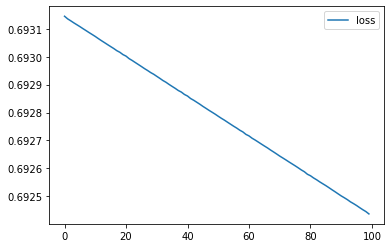

In [42]:
l.plot()